# Song Sale Prediction Using Linear Regression

Student: **Daniyal Mehraeen**

### Part A:

In [30]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [32]:
data = pd.read_csv("./song_sales.csv", index_col=0)

# Removing the Song Name from the Features as it is not used in regression
data = data.drop(data.columns[0], axis=1)
data

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_sales
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,35706.49
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,32282.58
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,37173.88
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,36195.62
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,27391.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,29347.80
18831,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,29347.80
18832,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,11249.99
18833,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,26902.15


Identifying the Features by using the counts of unique values in each column

In [33]:
# Determine unique value counts for each feature
unique_counts = data.nunique()

# Identify categorical and numerical features
categorical_features = []
numerical_features = []

for feature in unique_counts.index:
    if unique_counts[feature] <= 10:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

# Print the identified features
print("Categorical Features:")
print(categorical_features,"\n")

print("Numerical Features:")
print(numerical_features)

Categorical Features:
['audio_mode', 'time_signature'] 

Numerical Features:
['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence', 'song_sales']


### Part B:

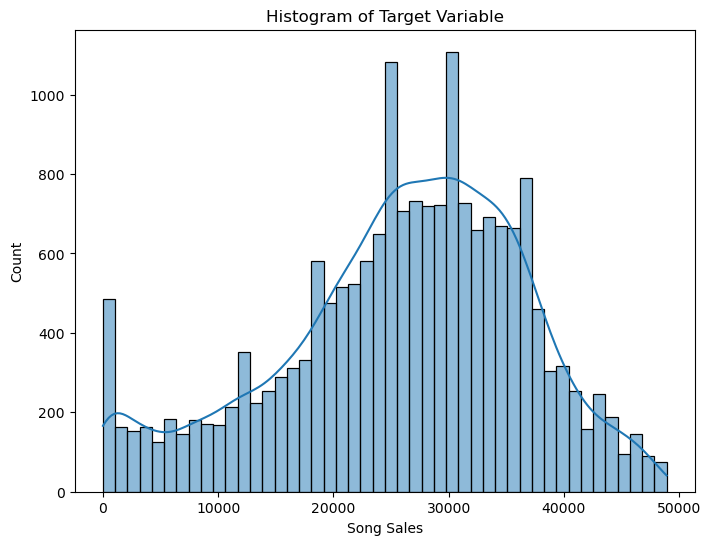

In [34]:
# Plotting histogram of the target variable
plt.figure(figsize=(8, 6))
sn.histplot(data=data, x='song_sales', kde=True)
plt.title('Histogram of Target Variable')
plt.xlabel('Song Sales')
plt.ylabel('Count')
plt.show()

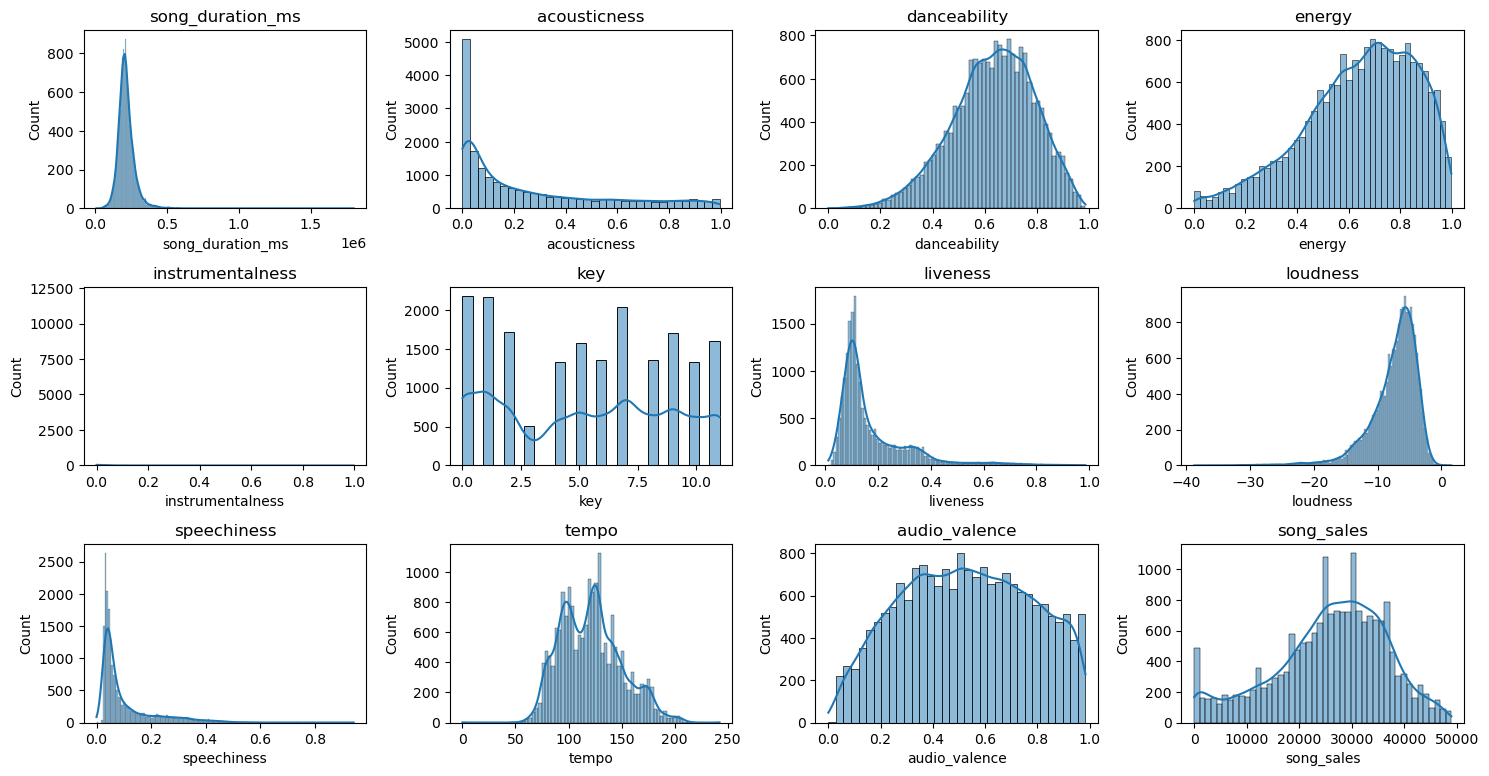

In [35]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sn.histplot(data=data, x=column, kde=True)
    axs[i].set_title(column)

# Removing empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### Part C:

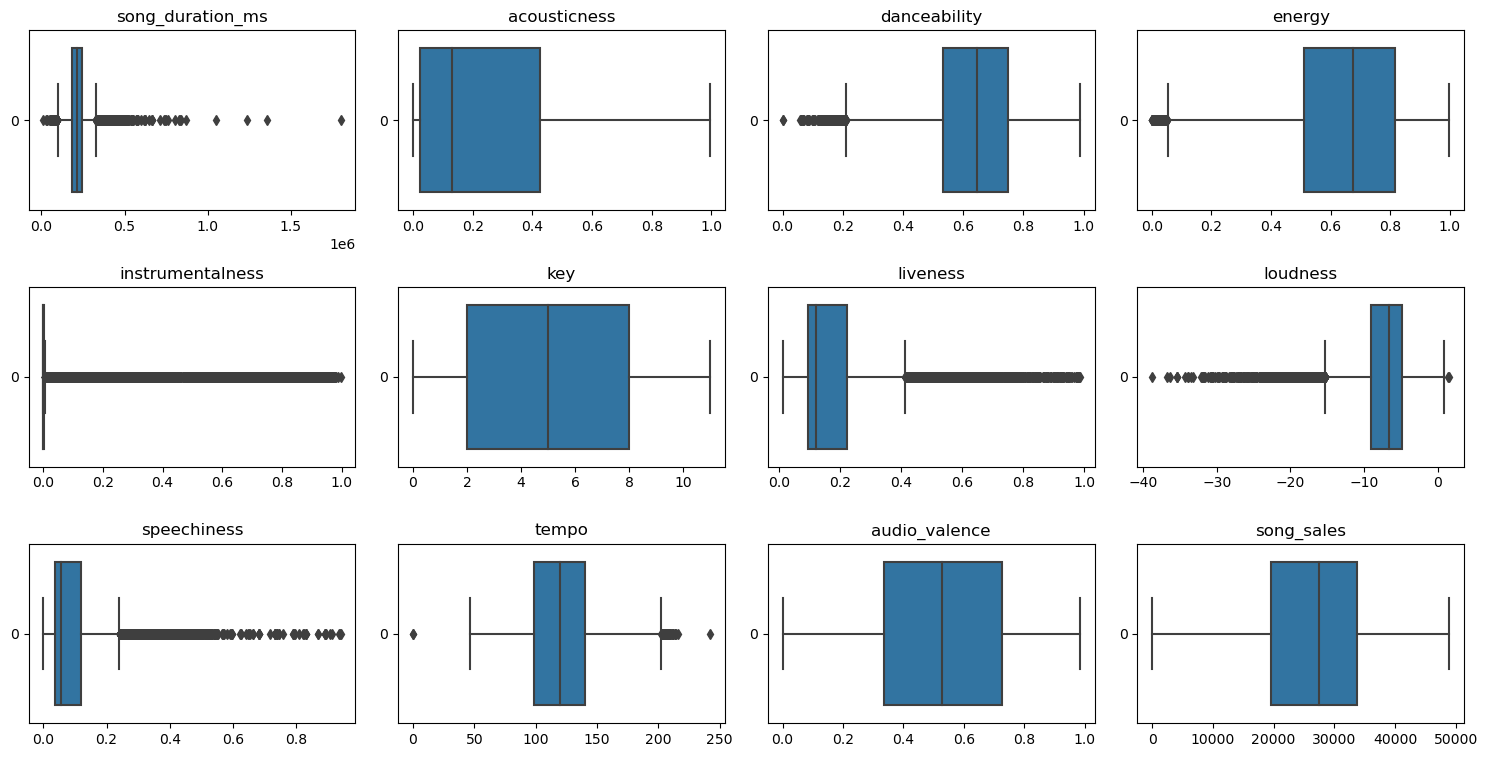

In [36]:
numerical_data = data[numerical_features]

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(numerical_data.columns):
        sn.boxplot(numerical_data[column], ax=axs[i],orient="h")
        axs[i].set_title(column)

# Remove empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [37]:
# Remove outliers
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)

removed_data = data.shape[0] - data[~outlier_mask].shape[0] 

data = data[~outlier_mask]

print(f"{removed_data} outlier data has been removed")

# Display the cleaned data
print("Cleaned Data:")
print(data)

7310 outlier data has been removed
Cleaned Data:
       song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
5                235893      0.008950         0.316   0.945          0.000002   
...                 ...           ...           ...     ...               ...   
18828            216173      0.862000         0.515   0.286          0.000069   
18829            195106      0.395000         0.644   0.523          0.000000   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18834            193533      0.911000         0.640   0.381 

### Part D:

<Axes: >

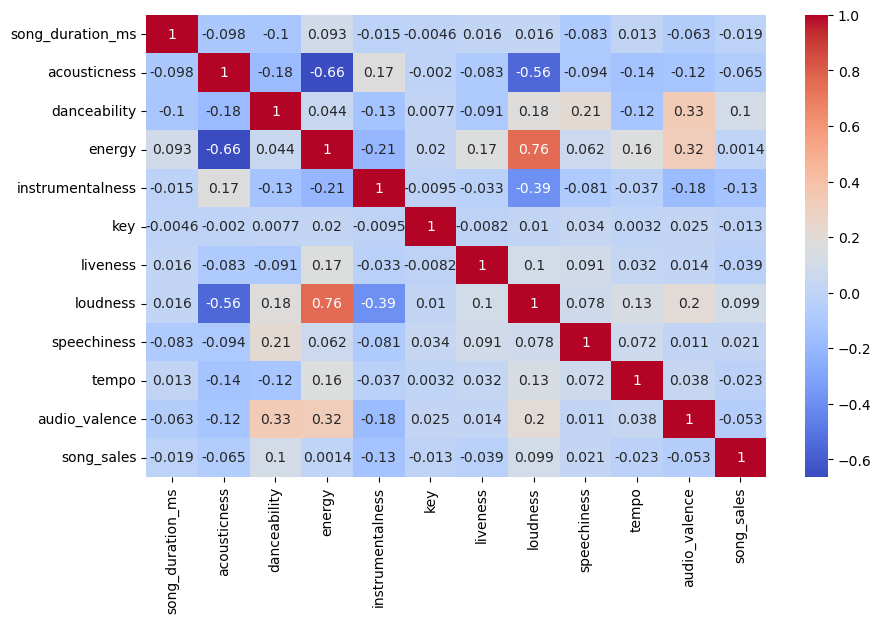

In [38]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10,6))

sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Part E:

In [39]:
# Finding highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

features_to_remove = set()
for feature in highly_correlated_features:
    correlated_features = [f for f in highly_correlated_features if f != feature]
    if len(correlated_features) > 1 :
        for correlated_feature in correlated_features:
            if correlation_matrix.loc[feature, correlated_feature] > 0.5:
                features_to_remove.add(feature)

# Remove the features with multiple high correlations
data = data.drop(columns=features_to_remove)

print(f"Following Column has been removed due to multicollinearity:")
print(features_to_remove)


Following Column has been removed due to multicollinearity:
{'loudness', 'energy'}


In [40]:
data

,song_duration_ms,acousticness,danceability,instrumentalness,key,liveness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_sales
0,262333,0.005520,0.496,0.000029,8,0.0589,1,0.0294,167.060,4,0.474,35706.49
1,216933,0.010300,0.542,0.000000,3,0.1080,0,0.0498,105.256,4,0.370,32282.58
3,216933,0.026400,0.451,0.003550,0,0.1020,1,0.1070,122.444,4,0.198,36195.62
4,223826,0.000954,0.447,0.000000,10,0.1130,1,0.0313,172.011,4,0.574,27391.28
5,235893,0.008950,0.316,0.000002,4,0.3960,0,0.1240,189.931,4,0.320,39130.40
...,...,...,...,...,...,...,...,...,...,...,...,...
18828,216173,0.862000,0.515,0.000069,5,0.1060,1,0.0378,115.076,4,0.284,31304.32
18829,195106,0.395000,0.644,0.000000,4,0.0930,1,0.0378,95.966,4,0.445,30326.06
18831,205666,0.765000,0.495,0.000001,11,0.1050,0,0.0301,94.286,4,0.265,29347.80
18832,182211,0.847000,0.719,0.000000,0,0.1250,1,0.0355,130.534,4,0.286,11249.99


### Part F:

Defining the Essetial Functions:

In [41]:
def gradient_descent(X, y, theta,learning_rate, num_iterations):
    num_samples = X.shape[0]
    cost = []
    
    for iteration in range(num_iterations):
        # Calculate predicted values
        y_pred = np.dot(X, theta)

        # Calculate error
        error = y_pred - y
        cost.append(np.sum(np.dot(error, error.T) )/num_samples)

        # Calculate gradients
        gradients = (1/num_samples) * np.dot(X.T, error)

        # Update parameters
        theta -= learning_rate * gradients

    return theta, cost

In [42]:
X = data.iloc[:,:-1].to_numpy()
Y = data["song_sales"].to_numpy()

# Hyperparameters
learning_rate = 0.00000000004
num_iterations = 100

theta = np.zeros(X.shape[1])

# Perform gradient descent
theta, costs = gradient_descent(X, Y,theta, learning_rate, num_iterations)

costs

[842144087.6751376,
 687916340.0666537,
 567487626.8795234,
 473450884.5270149,
 400022308.5455522,
 342685616.10843736,
 297914268.4643737,
 262954568.37127864,
 235656291.7607832,
 214340436.4994821,
 197695954.0294892,
 184699112.28582403,
 174550530.24284554,
 166626011.34950775,
 160438151.82483548,
 155606362.50134513,
 151833460.38608503,
 148887390.1846712,
 146586951.55614048,
 144790654.24209294,
 143388015.5959972,
 142292765.26028544,
 141437539.03950614,
 140769735.6119918,
 140248281.24380043,
 139841103.5160948,
 139523158.68555358,
 139274891.34905237,
 139081031.67306632,
 138929656.21043366,
 138811454.53927022,
 138719156.61807832,
 138647085.63607165,
 138590808.85641977,
 138546864.9772499,
 138512551.2415264,
 138485757.20183337,
 138464834.91563034,
 138448497.58723775,
 138435740.42244697,
 138425778.8278546,
 138418000.1538221,
 138411926.01297343,
 138407182.85659945,
 138403478.99924803,
 138400586.6783787,
 138398328.04564673,
 138396564.22819948,
 138395186

<Axes: >

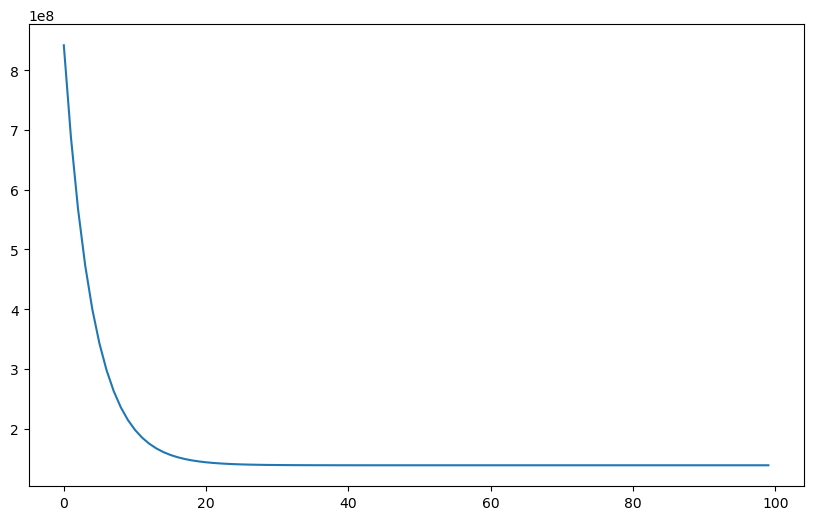

In [43]:
plt.figure(figsize=(10,6))

sn.lineplot(x=range(num_iterations), y=costs)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X,Y)

y_pred_scikit = reg.predict(X)
y_pred_linear = X@theta

scikit_avg_MSE =mean_squared_error(Y,y_pred_scikit)
implemented_avg_MSE = costs[-1]

print(f"Scikit learn Model Average MSE: {scikit_avg_MSE}\n")
print(f"Implemented Model Average MSE: {implemented_avg_MSE}\n")
print(f"Difference in Error (%): {(1-(scikit_avg_MSE/implemented_avg_MSE))*100}\n")

Scikit learn Model Average MSE: 112077159.0944408

Implemented Model Average MSE: 138915093.5421647

Difference in Error (%): 19.319667692969468



### Part G:

In [45]:
def lasso_regression(X, y,theta, alpha, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    cost = []

    for iteration in range(num_iterations):
        # Calculate predicted values
        y_pred = np.dot(X, theta)

        # Calculate error
        error = y_pred - y
        cost.append(np.sum(np.dot(error, error.T) )/num_samples)

        # Calculate gradients
        gradients = (1/num_samples) * np.dot(X.T, error) + alpha * np.sign(theta)

        # Update parameters
        theta -= learning_rate * gradients

    return theta, cost

def ridge_regression(X, y, theta, alpha, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    cost = []

    for iteration in range(num_iterations):
        # Calculate predicted values
        y_pred = np.dot(X, theta)

        # Calculate error
        error = y_pred - y
        cost.append(np.sum(np.dot(error, error.T) )/num_samples)

        # Calculate gradients
        gradients = (1/num_samples) * np.dot(X.T, error) + 2 * alpha * theta

        # Update parameters
        theta -= learning_rate * gradients

    return theta,  cost

In [46]:
X = data.iloc[:,:-1].to_numpy()
Y = data["song_sales"].to_numpy()

# Hyperparameters
learning_rate = 0.00000000004
num_iterations = 100
alpha = 0.1

# Performing gradient descent
theta_linear, costs_linear = gradient_descent(X, Y, np.zeros(X.shape[1]), learning_rate, num_iterations)
theta_lasso, costs_lasso = lasso_regression(X,Y, np.zeros(X.shape[1]),alpha,learning_rate,num_iterations)
theta_ridge, costs_ridge = ridge_regression(X,Y, np.zeros(X.shape[1]),alpha,learning_rate,num_iterations)

costs = [costs_linear,costs_lasso,costs_ridge]

0 Linear Regression [842144087.6751376, 687916340.0666537, 567487626.8795234, 473450884.5270149, 400022308.5455522, 342685616.10843736, 297914268.4643737, 262954568.37127864, 235656291.7607832, 214340436.4994821, 197695954.0294892, 184699112.28582403, 174550530.24284554, 166626011.34950775, 160438151.82483548, 155606362.50134513, 151833460.38608503, 148887390.1846712, 146586951.55614048, 144790654.24209294, 143388015.5959972, 142292765.26028544, 141437539.03950614, 140769735.6119918, 140248281.24380043, 139841103.5160948, 139523158.68555358, 139274891.34905237, 139081031.67306632, 138929656.21043366, 138811454.53927022, 138719156.61807832, 138647085.63607165, 138590808.85641977, 138546864.9772499, 138512551.2415264, 138485757.20183337, 138464834.91563034, 138448497.58723775, 138435740.42244697, 138425778.8278546, 138418000.1538221, 138411926.01297343, 138407182.85659945, 138403478.99924803, 138400586.6783787, 138398328.04564673, 138396564.22819948, 138395186.7871913, 138394111.04816622

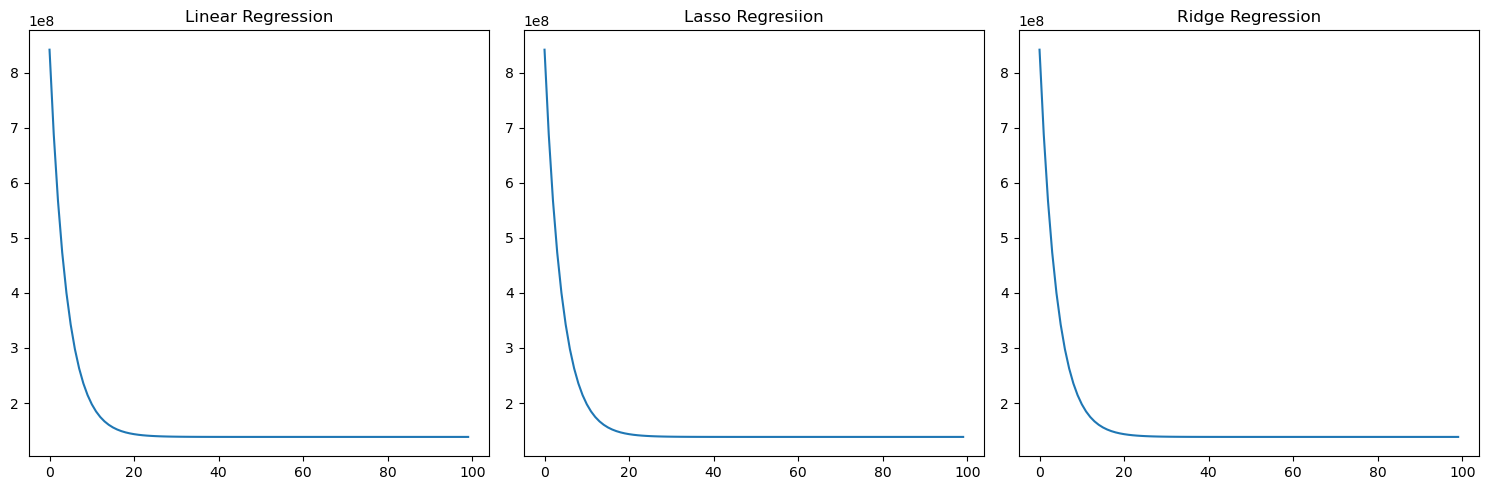

In [47]:
methods = ["Linear Regression", "Lasso Regresiion", "Ridge Regression"]

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
axs = axs.flatten()

for i, name in enumerate(methods):
        print(i, name,costs[i])
        sn.lineplot(x=range(num_iterations), y=costs[i],ax=axs[i])
        axs[i].set_title(name)
        
plt.tight_layout()
plt.show()

In [55]:
y_pred = [X@theta_linear, X@theta_lasso, X@theta_ridge]
errors = [mean_squared_error(y_true=Y, y_pred=y_pred[i]) for i in range(len(y_pred))]
for i, name in enumerate(methods):
    print(f"{name} MSE: {errors[i]}")



Linear Regression MSE: 138390242.52389988
Lasso Regresiion MSE: 138390242.52398416
Ridge Regression MSE: 138390242.52389994


### Part H:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = data.iloc[:,:-1].to_numpy()
y = data["song_sales"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
learning_rate = 0.00000000004
num_iterations = 100
alpha = 0.1

theta = np.zeros(X_train.shape[1])

# Performing gradient descent
theta, costs = gradient_descent(X_train, y_train,theta, learning_rate, num_iterations)

In [51]:
y_pred_test = X_test@theta

cost_test = np.mean(np.dot((y_pred_test - y_test), (y_pred_test - y_test).T))

<Axes: >

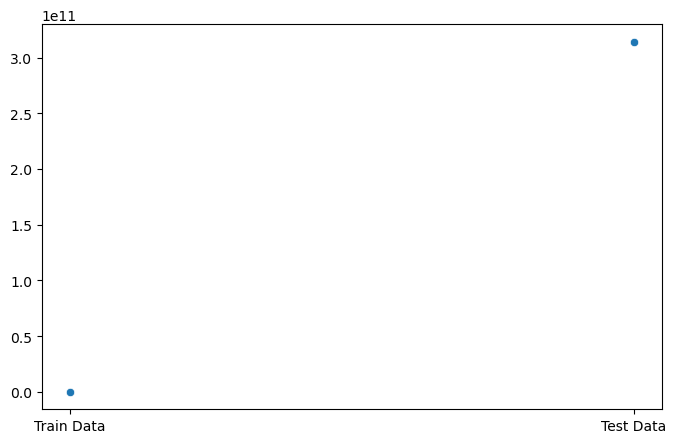

In [60]:
plt.figure(figsize=(8,5))

sn.scatterplot(x=["Train Data", "Test Data"], y=[costs[-1],cost_test])